In [1]:
# Import required libraries and dependencies
# import numpy as np
import pandas as pd
#import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


<Axes: xlabel='coin_id'>

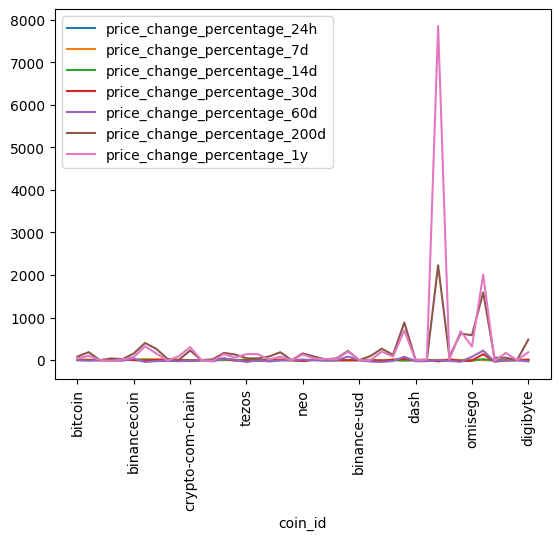

In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.plot.line(rot=90)

---

### Prepare the Data

In [5]:
# df_market_data.columns

In [6]:
df_market_data.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaler = StandardScaler().fit_transform(df_market_data)
# market_data_scaler.fit(df_market_data)


In [8]:
# Create a DataFrame with the scaled data
# df_market_data_scaled = pd.DataFrame(market_data_scaler.transform(df_market_data), index=df_market_data.index)
# df_market_data_scaled.plot.line(rot=90)
df_market_data_scaled=pd.DataFrame(market_data_scaler, columns= df_market_data.columns)

# Copy the crypto names from the original data
df_market_data_scaled['coin_id']=df_market_data.index
# Set the coinid column as index
df_market_data_scaled=df_market_data_scaled.set_index('coin_id')

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [9]:
# Create a list with the number of k-values from 1 to 11
k=list(range(1,11))

In [10]:
# Create an empty list to store the inertia values
inertias = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
  model= KMeans(n_clusters=i,random_state=0)
  model.fit(df_market_data_scaled)
  inertias.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [11]:
inertias

[287.0,
 195.82021818036043,
 123.19048183836958,
 79.02243535120977,
 65.302379141625,
 52.888518219775314,
 43.91469044757747,
 37.517032490103574,
 32.485240832183536,
 28.22289929060893]

In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data={'k': k,'Inertia':inertias}

# Create a DataFrame with the data to plot the Elbow curve
# elbow_data = {"k": list(range(1,11)), "Inertia": inertias}
elbow_df= pd.DataFrame(elbow_data)
elbow_df.head()

,k,Inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


<Axes: xlabel='k'>

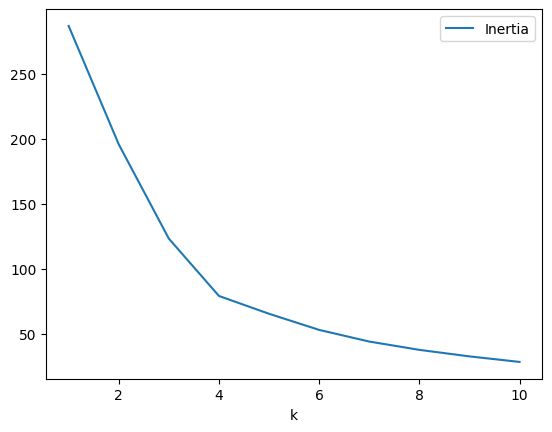

In [13]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line('k','Inertia')

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** = 4 been the lower number for 'k' and Inertia

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [14]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [15]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
market_data_pred=model.predict(df_market_data_scaled)
# Print the resulting array of cluster values.
market_data_pred

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 3, 2, 2, 2, 2],
      dtype=int32)

In [17]:
# Create a copy of the DataFrame
market_data_df_3 = df_market_data_scaled.copy()

In [18]:
# Add a new column to the DataFrame with the predicted clusters
market_data_df_3['segment_3'] = market_data_pred

# Display sample data
market_data_df_3.sample()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,segment_3
coin_id,,,,,,,,
okb,-0.923203,-1.437359,-0.629963,-0.460558,-0.058504,-0.457283,-0.1669,2


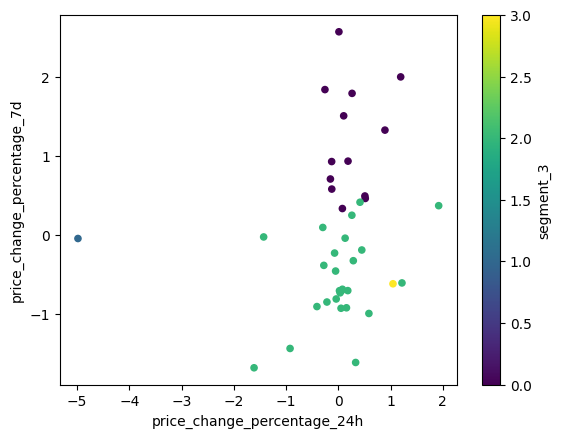

In [19]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
market_data_df_3.plot.scatter('price_change_percentage_24h','price_change_percentage_7d',
                              c='segment_3', colormap='viridis')
plt.show()

In [20]:
# cluster_plot=market_data_df_3.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='segment_3',
#                                 hover_cols=['coin_id'], marker=['hex', 'square', 'cross','inverted_triangle'],
#                                 title='Crypto Currecy Custers')
# cluster_plot

---

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [22]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.

crypto_info_pca=pca.fit_transform(df_market_data_scaled)


# View the first five rows of the DataFrame.
crypto_info_pca[0:5, ]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [23]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** the first 2 components as they have a highest value meaning they have more data meaning more importat information to be use

In [24]:
# Create a new DataFrame with the PCA data.
crypto_df = pd.DataFrame(crypto_info_pca, columns=['PC1','PC2','PC3'])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
crypto_df['coin_id']= df_market_data.index

# Set the coinid column as index
crypto_df=crypto_df.set_index('coin_id')

# Display sample data
crypto_df.sample(10)

,PC1,PC2,PC3
coin_id,,,
ontology,-0.632355,-2.108117,-0.652227
litecoin,-0.649468,0.432165,0.600303
vechain,-0.556315,-1.938209,-1.261776
binance-usd,-0.450211,-0.151019,-0.647401
celsius-degree-token,4.792395,6.767679,-1.986985
chainlink,-0.450711,0.517699,2.846143
eos,-0.693425,-0.473815,-0.527597
huobi-token,-0.407483,-0.212507,-0.351426
tezos,-0.796176,-0.494409,1.082812


---

### Find the Best Value for k Using the PCA Data

In [25]:
# Create a list with the number of k-values from 1 to 11
k=list(range(1,11))

In [26]:
# Create an empty list to store the inertia values
inertias=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
  model= KMeans(n_clusters=i,random_state=0)
  model.fit(df_market_data_scaled)
  inertias.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data1={'k': k,'Inertia':inertias}
# Create a DataFrame with the data to plot the Elbow curve
elbow1_df = pd.DataFrame(elbow_data1)
elbow1_df.head()

,k,Inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


<Axes: xlabel='k'>

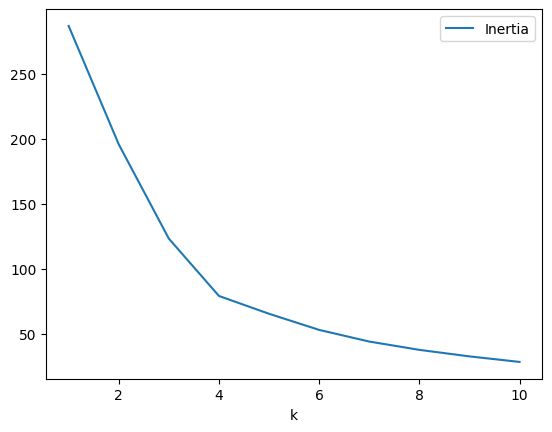

In [28]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow1_df.plot('k','Inertia')

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It is diferent is more exact here we can see clearly that is 4, in the original one was between 3-4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4)

In [30]:
# Fit the K-Means model using the PCA data
model.fit(crypto_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [31]:
# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_pred = model.predict(crypto_df)
# Print the resulting array of cluster values.
crypto_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1],
      dtype=int32)

In [38]:
# Create a copy of the DataFrame with the PCA data

PCA_crypto_df = crypto_df.copy()
# Add a new column to the DataFrame with the predicted clusters
PCA_crypto_df['PC_segment'] = crypto_pred

# Display sample data
PCA_crypto_df.sample(10)

,PC1,PC2,PC3,PC_segment
coin_id,,,,
usd-coin,-0.438408,-0.175337,-0.663388,1
eos,-0.693425,-0.473815,-0.527597,1
leo-token,-0.413296,-0.674115,-1.076628,1
tezos,-0.796176,-0.494409,1.082812,0
neo,-0.362120,-0.986914,-0.728752,1
binance-usd,-0.450211,-0.151019,-0.647401,1
ontology,-0.632355,-2.108117,-0.652227,1
cdai,-0.513528,-0.142802,-0.656566,1
chainlink,-0.450711,0.517699,2.846143,0


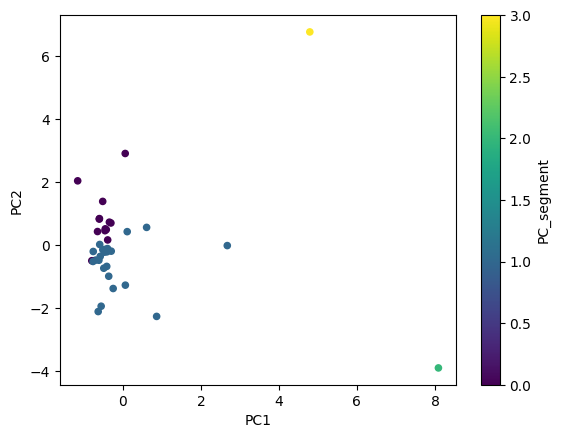

In [33]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
PCA_crypto_df.plot.scatter('PC1','PC2', c='PC_segment', colormap='viridis')
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

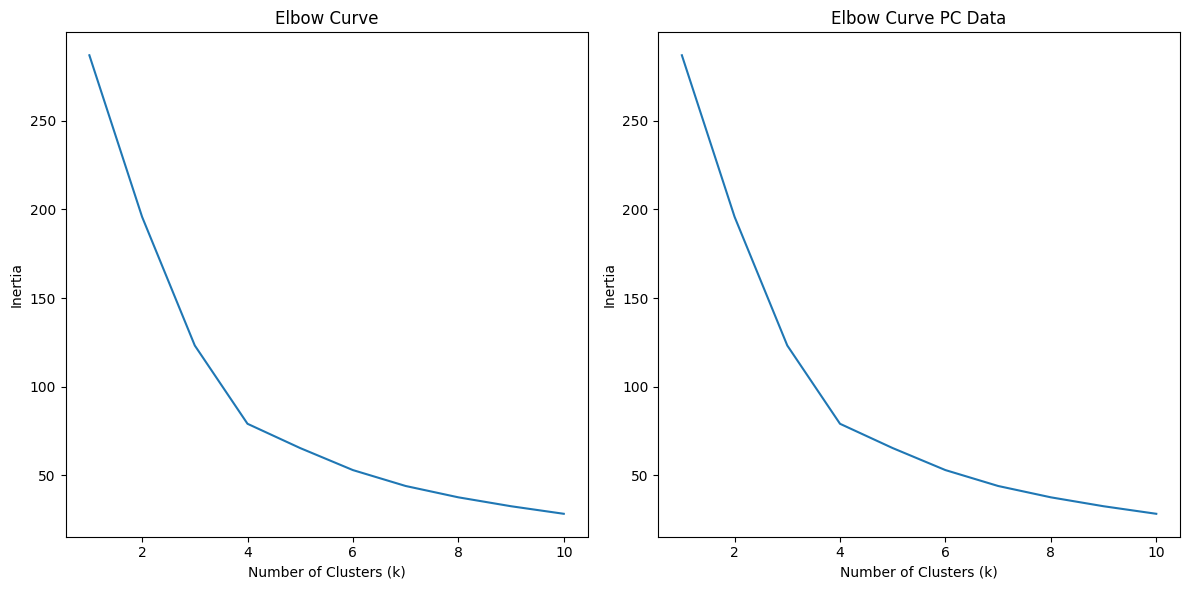

In [34]:
# Composite plot to contrast the Elbow curves

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(elbow_df['k'], elbow_df['Inertia'])
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Curve')

axes[1].plot(elbow1_df['k'], elbow1_df['Inertia'])
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Inertia')
axes[1].set_title('Elbow Curve PC Data')

plt.tight_layout()

plt.show()


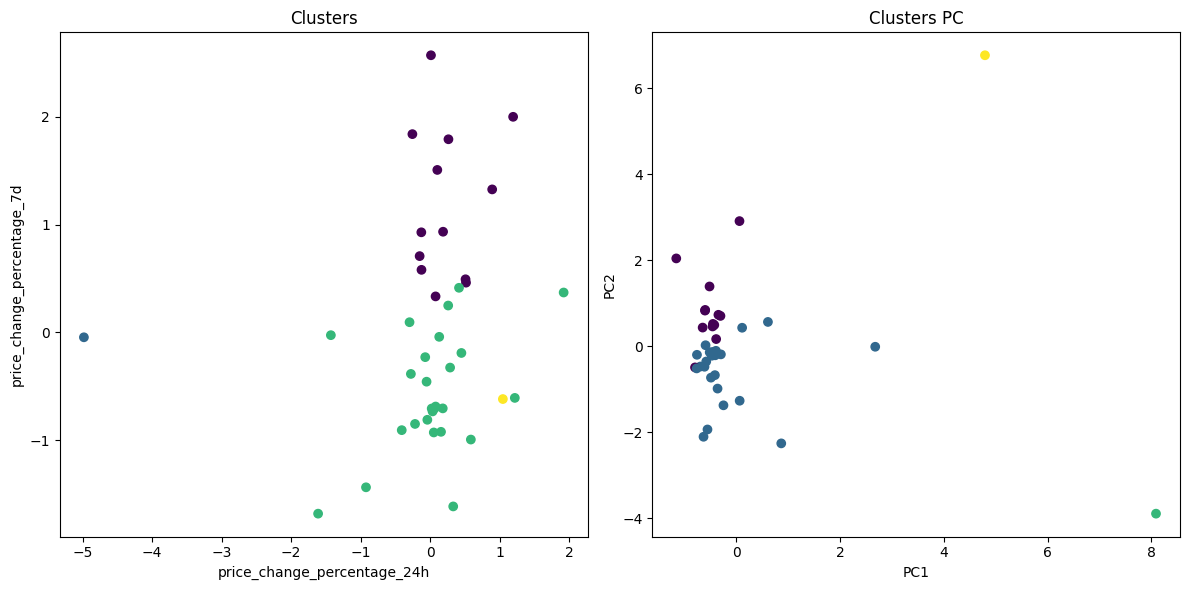

In [39]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(market_data_df_3['price_change_percentage_24h'], market_data_df_3['price_change_percentage_7d'],
                c=market_data_df_3['segment_3'], cmap='viridis')
axes[0].set_xlabel('price_change_percentage_24h')
axes[0].set_ylabel('price_change_percentage_7d')
axes[0].set_title('Clusters')


axes[1].scatter(PCA_crypto_df['PC1'], PCA_crypto_df['PC2'], c=PCA_crypto_df['PC_segment'], cmap='viridis')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Clusters PC')

plt.tight_layout()
plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  we can use less features and get similar performances to the original model since we can clearly indentify the clusters. Aso if we reduce number of columns make it easy to visualize the value of the cluster

